In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('combined.csv')

In [3]:
df.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,...,Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Comparison
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1001,2024-12-01,...,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,True
1,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1004,2024-12-02,...,4.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,False
2,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1009,2024-12-05,...,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,False
3,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0,1002,2024-12-01,...,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,True
4,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0,1006,2024-12-03,...,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,False


In [4]:
df.isnull().sum()

Session ID           0
User ID              0
Dish Name            0
Meal Type            0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               6
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Comparison           0
dtype: int64

In [5]:
df['Rating'].mean()

4.25

In [6]:
df['Rating'] = df['Rating'].fillna(4.25)

In [7]:
df.isnull().sum()

Session ID           0
User ID              0
Dish Name            0
Meal Type            0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Comparison           0
dtype: int64

C:\Users\Mateen\AppData\Local\Temp\ipykernel_10728\37722070.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dishes.values, y=top_10_dishes.index, palette='Blues_r')


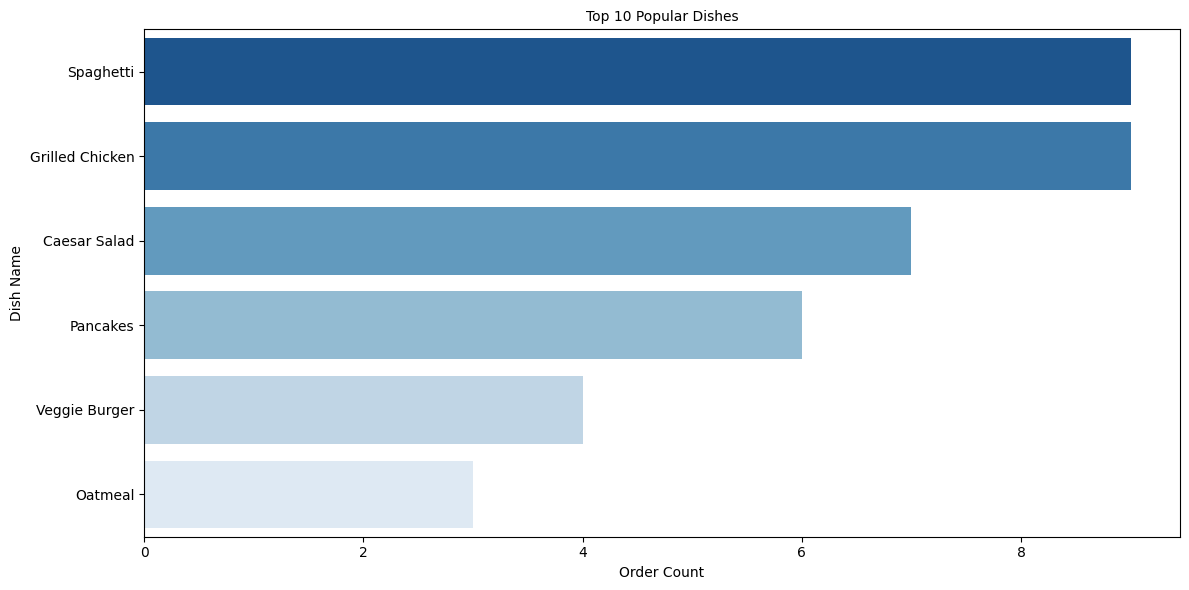

In [31]:
#Popular Dishes
#Count and sort
popular_dishes = df['Dish Name'].value_counts()

# Bar plot
top_10_dishes = popular_dishes.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dishes.values, y=top_10_dishes.index, palette='Blues_r')
plt.title('Top 10 Popular Dishes', fontsize=10)
plt.xlabel('Order Count')
plt.ylabel('Dish Name')
plt.tight_layout()
plt.show()

In [9]:
df['Dish Name'].value_counts()

Dish Name
Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: count, dtype: int64

In [10]:
demographics_behavior = df.groupby(['Location', 'Age']).agg({
    'Total Orders': 'sum',
    'Amount (USD)': 'mean'
}).reset_index()
print(demographics_behavior)

        Location  Age  Total Orders  Amount (USD)
0         Austin   25             7     13.000000
1         Boston   38            14     14.000000
2        Chicago   42           135     10.666667
3    Los Angeles   35            72     10.333333
4          Miami   31             5     11.000000
5       New York   28           108     11.666667
6  San Francisco   27            40     10.750000
7        Seattle   30            36     11.250000


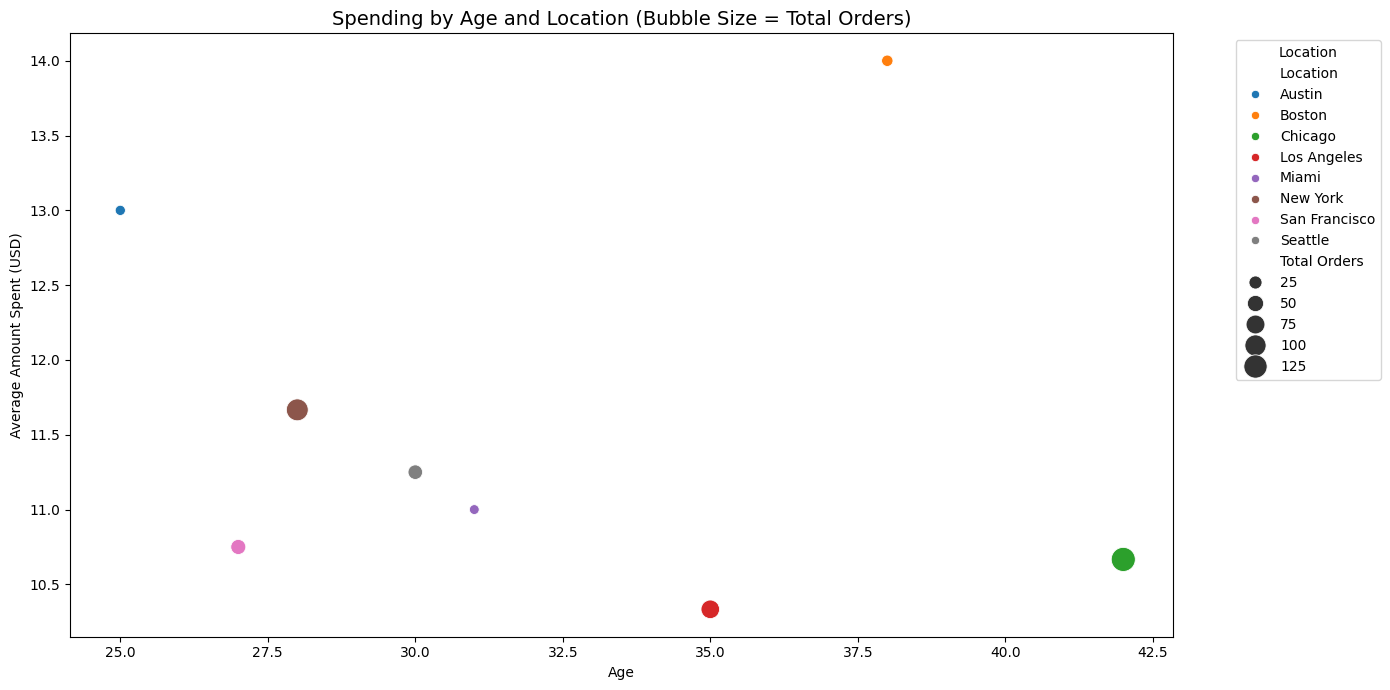

In [11]:
# Scatter plot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=demographics_behavior,
    x='Age',
    y='Amount (USD)',
    hue='Location',
    palette='tab10',
    size='Total Orders',
    sizes=(50, 300)
)
plt.title('Spending by Age and Location (Bubble Size = Total Orders)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Average Amount Spent (USD)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
df.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,...,Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Comparison
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1001,2024-12-01,...,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,True
1,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1004,2024-12-02,...,4.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,False
2,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1009,2024-12-05,...,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,False
3,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0,1002,2024-12-01,...,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,True
4,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0,1006,2024-12-03,...,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,False


In [13]:
#relationships
session_order_relationship = df.groupby(['Session ID', 'Dish Name']).agg({
    'Duration (mins)': 'mean',
    'Session Rating': 'mean',
    'Amount (USD)': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Order Count'})
print(session_order_relationship)

                            Duration (mins)  Session Rating  Amount (USD)  \
Session ID Dish Name                                                        
S001       Spaghetti                   30.0             4.5          35.0   
S002       Caesar Salad                20.0             4.0          31.0   
S003       Grilled Chicken             40.0             4.8          32.0   
S004       Pancakes                    30.0             4.2          35.0   
S005       Caesar Salad                15.0             4.7          21.5   
S006       Spaghetti                   30.0             4.3          31.0   
S007       Grilled Chicken             45.0             4.6          22.5   
S008       Veggie Burger               20.0             4.4          32.0   
S009       Grilled Chicken             40.0             4.9          35.0   
S010       Oatmeal                     10.0             4.1          31.0   
S011       Pancakes                    30.0             4.6          32.0   

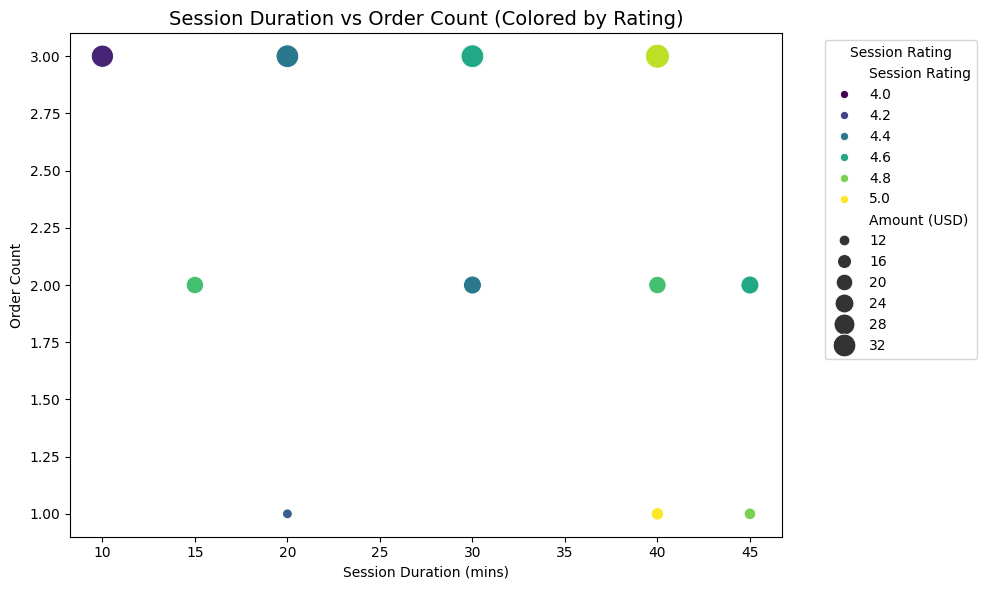

In [14]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=session_order_relationship,
    x='Duration (mins)',
    y='Order Count',
    hue='Session Rating',
    palette='viridis',
    size='Amount (USD)',
    sizes=(50, 300)
)
plt.title('Session Duration vs Order Count (Colored by Rating)', fontsize=14)
plt.xlabel('Session Duration (mins)')
plt.ylabel('Order Count')
plt.legend(title='Session Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'Order ID',
       'Order Date', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating',
       'User Name', 'Age', 'Location', 'Registration Date', 'Phone', 'Email',
       'Favorite Meal', 'Total Orders', 'Comparison'],
      dtype='object')

In [24]:
# Count of dishes accordingly to ages
orders = df.groupby('Age')['Dish Name'].value_counts()
print(orders)

Age  Dish Name      
25   Grilled Chicken    1
27   Caesar Salad       2
     Spaghetti          2
28   Grilled Chicken    3
     Pancakes           3
     Spaghetti          3
30   Caesar Salad       2
     Grilled Chicken    2
31   Veggie Burger      1
35   Caesar Salad       3
     Oatmeal            3
     Spaghetti          3
38   Spaghetti          1
42   Grilled Chicken    3
     Pancakes           3
     Veggie Burger      3
Name: count, dtype: int64


In [47]:
#grouping the age into the age groups
age_bins=[0,10,20,30,40,50,60]
age_labels=['0-10','10-20','20-30','30-40','40-50','50-60']
df['age group']= pd.cut(df['Age'],bins=age_bins,labels=age_labels)

C:\Users\Mateen\AppData\Local\Temp\ipykernel_10728\1198550261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ordersbyage = df.groupby('age group')['Dish Name'].value_counts().unstack()


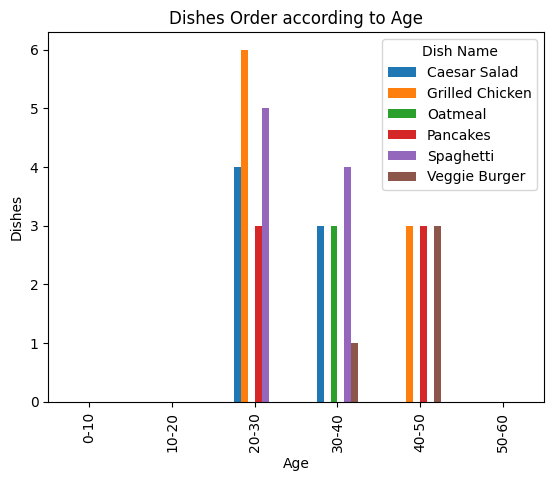

In [48]:
ordersbyage = df.groupby('age group')['Dish Name'].value_counts().unstack()
ordersbyage = ordersbyage.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Dishes')
plt.title('Dishes Order according to Age')
plt.show()

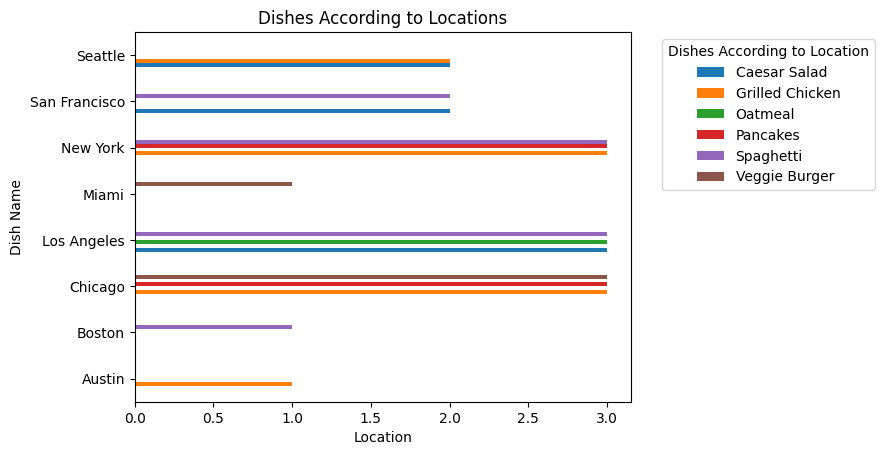

In [45]:
Dishesbylocation = df.groupby('Location')['Dish Name'].value_counts().unstack()
Dishesbylocation = Dishesbylocation.plot(kind = 'barh')
plt.xlabel('Location')
plt.ylabel('Dish Name')
plt.title('Dishes According to Locations')
plt.legend(title='Dishes According to Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()